# JPEG DCT Image Compression Demo

In [2]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab

%matplotlib inline

### 1.1 Display the sample image

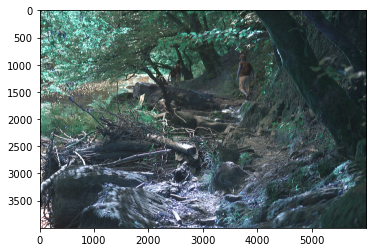

In [3]:
import cv2 as cv

im = cv.imread("images/forest.JPG")
# im = cv.imread("images/rocks.JPG")

f = plt.figure()
plt.imshow(im,cmap='gray')

### 1.2 Define 2D DCT and inverse IDCT

In [4]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

## 2. Perform a blockwise DCT

In [5]:
imsize = im.shape
dct = np.zeros(imsize)
block_size = 8

# Do DCT on image
for i in r_[:imsize[0]:block_size]:
    for j in r_[:imsize[1]:block_size]:
        dct[i:(i+block_size),j:(j+block_size)] = dct2( im[i:(i+block_size),j:(j+block_size)] )

2.1. Extract M x M block and look at its DCT coefficients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'An 8x8 DCT block')

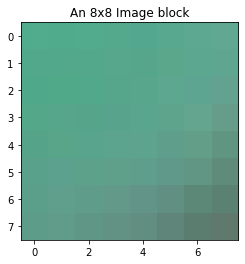

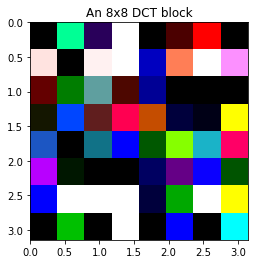

In [6]:
pos = 250
# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+block_size,pos:pos+block_size],cmap='gray')
plt.title(f"An {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+block_size,pos:pos+block_size],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title(f"An {block_size}x{block_size} DCT block")

### 2.2 Display all DCT M x M blocks

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

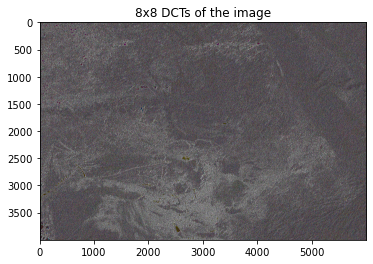

In [7]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title(f"{block_size}x{block_size} DCTs of the image")

### 2.3 Threshold DCT coefficients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 12.5979125% of the DCT coefficients


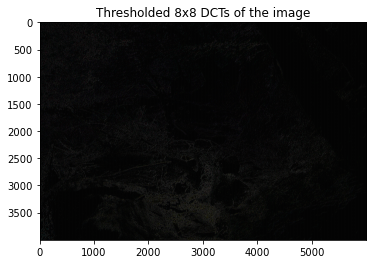

In [8]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title(f"Thresholded {block_size}x{block_size} DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print (f"Keeping only {percent_nonzeros*100.0}% of the DCT coefficients")

## 3. Compare DCT compressed image with original

In [10]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:block_size]:
    for j in r_[:imsize[1]:block_size]:
        im_dct[i:(i+block_size),j:(j+block_size)] = (
            idct2( dct_thresh[i:(i+block_size),j:(j+block_size)]))
        
cv.imwrite("images/output.jpg", im_dct)

True

Text(0.5, 1.0, 'Compressed sample')

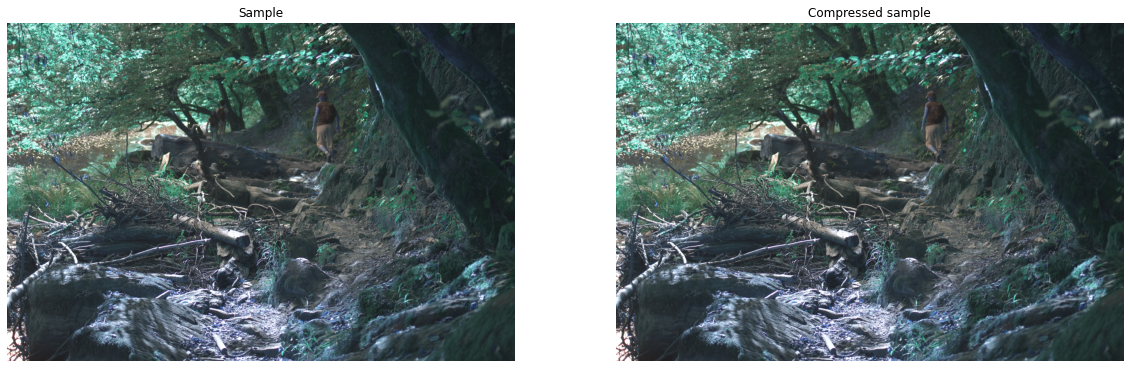

In [21]:
im_compressed = cv.imread("images/output.jpg")


# create figure
fig = plt.figure(figsize=(20, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(im)
plt.axis('off')
plt.title("Sample")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(im_compressed)
plt.axis('off')
plt.title("Compressed sample")
  